# Blood Glucose Control - EDA

**Name:** Andrew Yang



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [2]:
import pandas as pd

df = pd.read_csv('../data/gluroo_500030.csv')
df['patient_id'] = 500030

second_df = pd.read_csv('../data/gluroo_679372.csv')
second_df['patient_id'] = 679372

df = pd.concat([df, second_df])
df['interval'] = df['date'].apply(lambda x: x[27:29]) # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19]) # trimming the tail
 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

In [3]:
import matplotlib.pyplot as plt

/var/folders/yc/fj0w5k890gjbcm5p5bkv9vs40000gn/T/ipykernel_90123/1624786761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat1['healthy'] = df_pat1['bgl'].apply(lambda x: 'In range (70-110 mg/dL)' if 70 <= x <= 110
/var/folders/yc/fj0w5k890gjbcm5p5bkv9vs40000gn/T/ipykernel_90123/1624786761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat2['healthy'] = df_pat2['bgl'].apply(lambda x: 'In range (70-110 mg/dL)' if 70 <= x <= 110


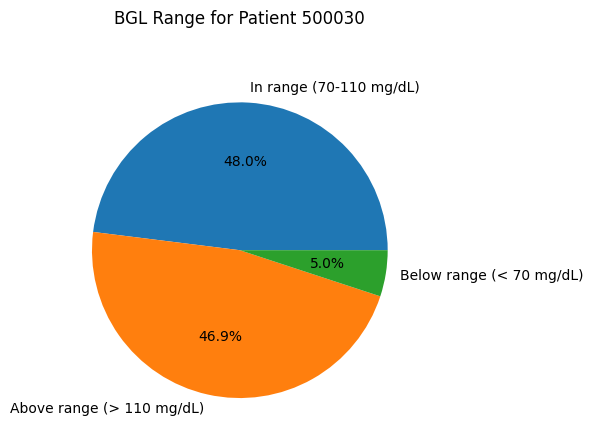

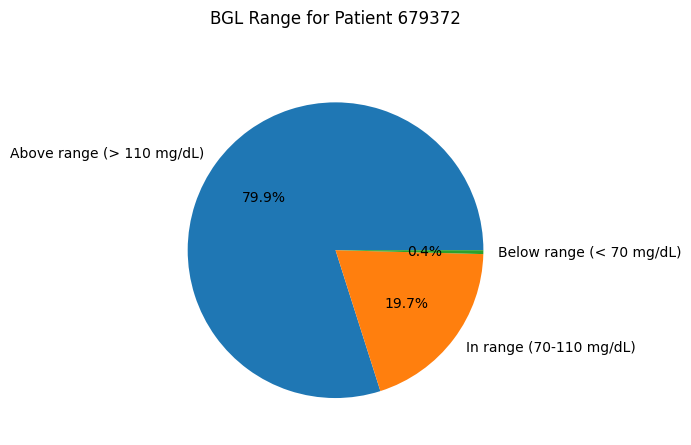

In [4]:
df_reading = df[df['__typename'] == 'Reading']
df_pat1 = df_reading[df_reading['patient_id'] == 500030]
df_pat2 = df_reading[df_reading['patient_id'] == 679372]

df_pat1['healthy'] = df_pat1['bgl'].apply(lambda x: 'In range (70-110 mg/dL)' if 70 <= x <= 110 
                                           else 'Below range (< 70 mg/dL)' if x < 70 
                                           else 'Above range (> 110 mg/dL)')
df_pat2['healthy'] = df_pat2['bgl'].apply(lambda x: 'In range (70-110 mg/dL)' if 70 <= x <= 110 
                                           else 'Below range (< 70 mg/dL)' if x < 70 
                                           else 'Above range (> 110 mg/dL)')


df_pat1['healthy'].value_counts().plot(kind='pie', autopct='%1.1f%%',ylabel='')
# plt.axis('equal')
plt.title('BGL Range for Patient 500030', pad=30)
plt.show()

df_pat2['healthy'].value_counts().plot(kind='pie', autopct='%1.1f%%',ylabel='')
# plt.axis('equal')
plt.title('BGL Range for Patient 679372', pad=30)
plt.show()

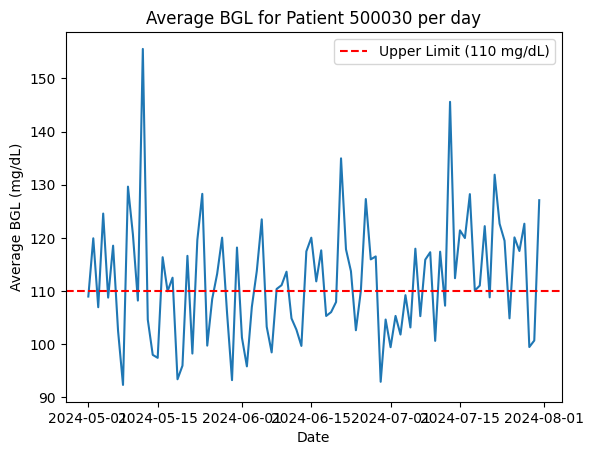

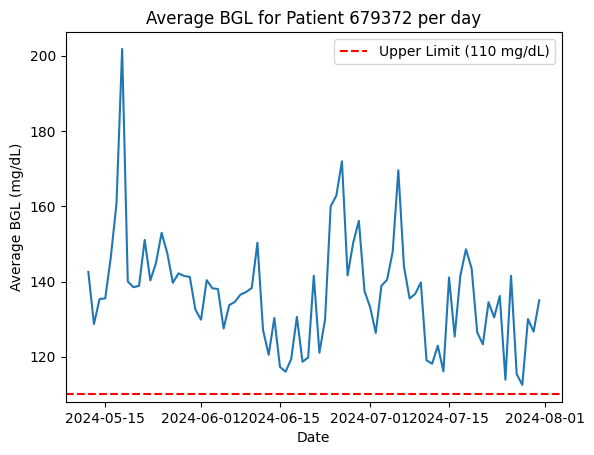

In [5]:
import numpy as np

day_avg_pat1 = []

for date, group in df_pat1.groupby(df_pat1['date'].dt.date):
    day_avg_pat1.append(np.average(group['bgl']))

plt.plot(df_pat1['date'].dt.date.unique(), day_avg_pat1)
plt.title('Average BGL for Patient 500030 per day')
plt.axhline(y=110, color='r', linestyle='--', label='Upper Limit (110 mg/dL)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average BGL (mg/dL)')
plt.show()

day_avg_pat2 = []

for date, group in df_pat2.groupby(df_pat2['date'].dt.date):
    day_avg_pat2.append(np.average(group['bgl']))

plt.plot(df_pat2['date'].dt.date.unique(), day_avg_pat2)
plt.title('Average BGL for Patient 679372 per day')
plt.axhline(y=110, color='r', linestyle='--', label='Upper Limit (110 mg/dL)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average BGL (mg/dL)')
plt.show()

(np.int64(995), np.int64(0), np.int64(0))

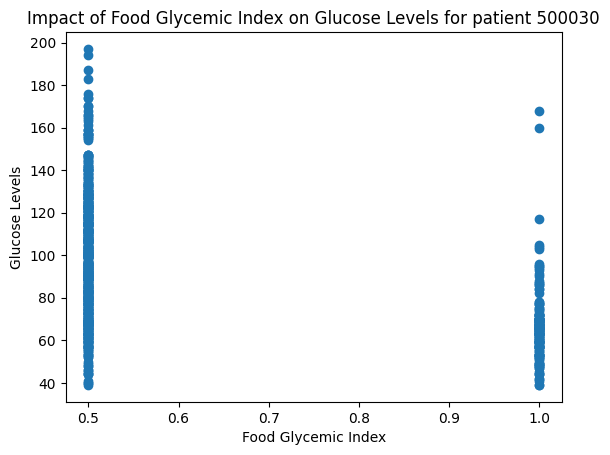

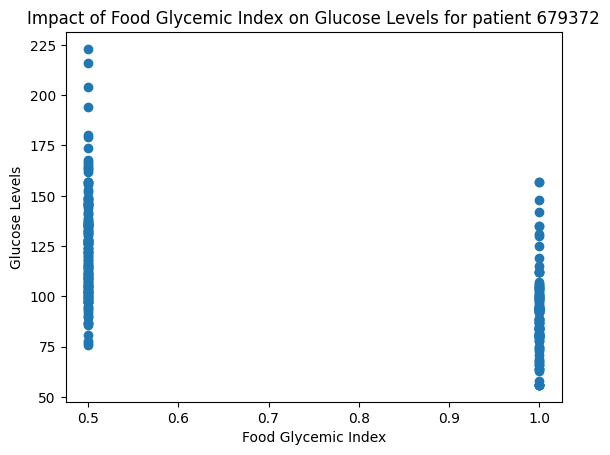

In [15]:
#  Impact of Food Glycemic Index on Glucose Levels

df_pat1 = df[df['patient_id'] == 500030]
df_pat2 = df[df['patient_id'] == 679372]

plt.scatter(df_pat1['food_glycemic_index'], df_pat1['bgl'])
plt.xlabel('Food Glycemic Index')
plt.ylabel('Glucose Levels')
plt.title('Impact of Food Glycemic Index on Glucose Levels for patient 500030')
plt.show()

#  Impact of Food Glycemic Index on Glucose Levels

plt.scatter(df_pat2['food_glycemic_index'], df_pat2['bgl'])
plt.xlabel('Food Glycemic Index')
plt.ylabel('Glucose Levels')
plt.title('Impact of Food Glycemic Index on Glucose Levels for patient 679372')
plt.show()

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Based on the timestamp data (bgl_date_millis), can we design a real-time alert system to warn users of impending blood glucose anomalies?
2. How do the variables like food_glycemic_index and food_g affect blood glucose levels? Can we build a model to predict these interactions?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`